# K-Means algorithm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring penguins dataset

We have recieved information about a group of penguins placed in the [Palmer Archipelago](https://goo.gl/maps/AcdUwugk8CQC4x73A). Our research team, WBS Explorers School, suspects there are multiple penguins species, but we only have information about their: 

* Bill length
* Bill depth
* Flipper length
* Body mass

How can we find the different species?


In [ ]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
penguins.drop(['species','island','sex'], axis=1, inplace=True)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


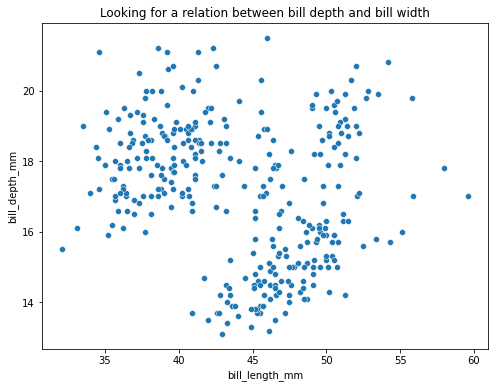

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')
plt.title('Looking for a relation between bill depth and bill width')
plt.show()

In [ ]:
peng_cl = penguins[['bill_length_mm','bill_depth_mm']]
peng_cl.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


### Data Scaling

In [ ]:
peng_cl.describe()

,bill_length_mm,bill_depth_mm
count,333.000000,333.000000
mean,43.992793,17.164865
std,5.468668,1.969235
min,32.100000,13.100000
25%,39.500000,15.600000
50%,44.500000,17.300000
75%,48.600000,18.700000
max,59.600000,21.500000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
peng_cl_norm = MinMaxScaler().fit_transform(peng_cl)

# let's see the first 5 observations after normalising the data
peng_cl_norm = pd.DataFrame(peng_cl_norm)
peng_cl_norm.columns = ['bill_length_mm','bill_depth_mm']
peng_cl_norm[:5]

,bill_length_mm,bill_depth_mm
0,0.254545,0.666667
1,0.269091,0.511905
2,0.298182,0.583333
3,0.167273,0.738095
4,0.261818,0.892857


### K-means

In [ ]:
from sklearn.cluster import KMeans

# Based on the quick look to the scatter plot, 
# we are going to assume there can be 3 different species.
kmeans = KMeans(n_clusters=3)
kmeans.fit(peng_cl_norm)

KMeans(n_clusters=3)

In [ ]:
kmeans.cluster_centers_

array([[0.54930303, 0.22480159],
       [0.64637762, 0.66703297],
       [0.24378378, 0.61357786]])

In [ ]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['bill_length_mm','bill_depth_mm']
cl_pos

,bill_length_mm,bill_depth_mm
0,0.549303,0.224802
1,0.646378,0.667033
2,0.243784,0.613578


### Explore our KMeans results

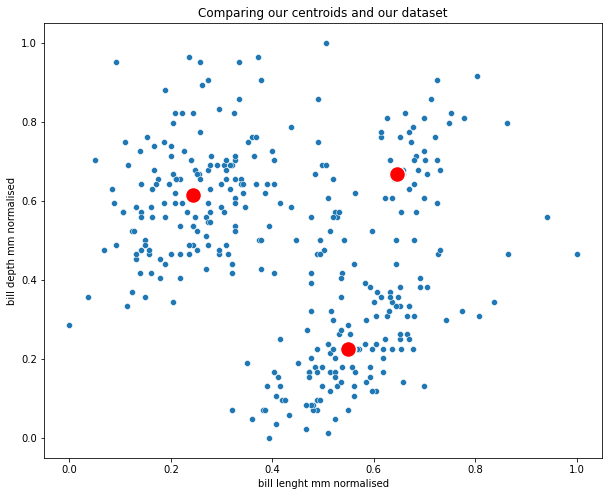

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(peng_cl_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('bill lenght mm normalised')
plt.ylabel('bill depth mm normalised')
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm')
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

In [ ]:
penguins['cluster'] = kmeans.labels_
penguins.sample(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
279,50.4,15.3,224.0,5550.0,0
22,35.9,19.2,189.0,3800.0,2
82,36.7,18.8,187.0,3800.0,2
70,33.5,19.0,190.0,3600.0,2
343,49.9,16.1,213.0,5400.0,0


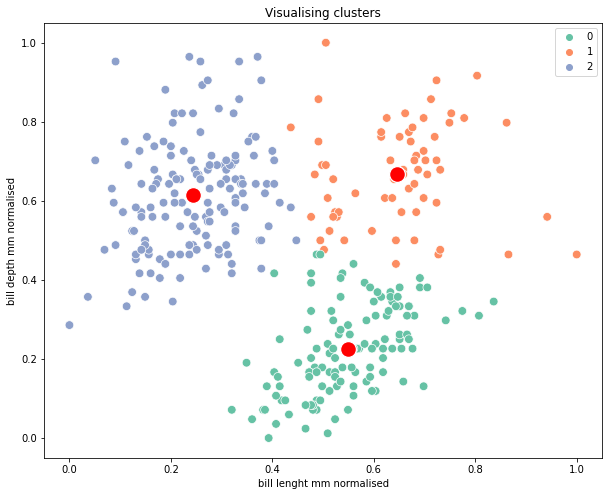

In [ ]:
# create plot dataframe
plot_data = pd.DataFrame(peng_cl_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm']
plot_data['cluster'] = kmeans.labels_

# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('bill lenght mm normalised')
plt.ylabel('bill depth mm normalised')

# scatter plot
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

Understanding a data science process: 

![Data Science Process](https://www.researchgate.net/publication/322310310/figure/fig1/AS:611851016601600@1522888058853/CRISP-DM-methodology-Source-Chapman-et-al-2000.png)

Conclusion: 

Using KMeans, we were able to identify each observation to which species could belong.

![](https://i.imgur.com/orZWHly.png)

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081


